<a href="https://colab.research.google.com/github/Sugam1530/Productionization-of-ML-Systems/blob/main/Productionization_of_ML_Systems_Regression(Specialization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on building a comprehensive flight price prediction system using machine learning. The system incorporates data preprocessing, model training, real-time prediction capabilities via a REST API, and deployment strategies for scalability and automation. Below is an overview of the key components of the project.

1. Dataset and Feature Engineering
The dataset (flights_df) contains flight details with columns such as travelCode, userCode, from, to, flightType, price, time, distance, agency, and date. The project involved extensive feature engineering, focusing on handling categorical variables (from, to, flightType, agency) using one-hot encoding. Numerical features like distance, time, and price were retained. The processed data was prepared by combining the encoded categorical variables with the numerical ones to form the final feature set.

2. Model Selection and Training
A Random Forest Regressor was selected for predicting flight prices due to its ability to manage both categorical and numerical data efficiently. The model was trained on the processed dataset, with appropriate hyperparameters for optimal performance. The trained model was then serialized using joblib and saved as random_forest_model.pkl for later use in serving predictions through an API.

3. REST API Development
A Flask-based REST API was created to serve the trained model, enabling real-time flight price predictions. The API includes a /predict endpoint that accepts POST requests with flight details in JSON format. Incoming data is preprocessed within the API by applying the same encoding steps as during training, ensuring consistency between the training and prediction phases. The prediction is returned as a JSON response.

4. Deployment and Scalability
During the development phase, ngrok was used to expose the locally running Flask API to the internet for testing purposes. For deployment, the entire application, including the Flask API and the trained model, was containerized using Docker. This ensured portability and ease of deployment across different environments. Kubernetes was then employed to deploy the containerized application for scalability and efficient management of varying loads. Kubernetes enabled the system to handle increased traffic and distribute requests across multiple instances seamlessly.

5. Automated Workflows with Apache Airflow
Apache Airflow was integrated into the system to automate workflows related to the flight price prediction model. This included tasks such as data preprocessing, model training, and redeployment when new data becomes available. Directed Acyclic Graphs (DAGs) in Airflow were used to manage these workflows efficiently, ensuring a repeatable and organized approach to automation.

6. Continuous Integration and Continuous Deployment (CI/CD) with Jenkins
To maintain consistent and reliable deployments, a CI/CD pipeline was set up using Jenkins. The pipeline automates testing and deployment of changes made to the model or the API, ensuring that updates are rolled out smoothly without manual intervention. This approach improves the reliability and stability of the system over time.

7. Model Tracking with MLFlow
MLFlow was utilized to manage and track different versions of the flight price prediction model. By capturing key metrics, experiment details, and version history, MLFlow allowed systematic experimentation and iteration, ensuring that the best-performing models were deployed to production.

# **GitHub Link -**

https://github.com/Sugam1530/Productionization-of-ML-Systems

# **Problem Statement**


**Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.**



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Install necessary libraries
!pip install Flask flask-ngrok pyngrok

In [2]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [3]:
import sklearn
sklearn.__version__

'1.5.1'

In [4]:
# Import Libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import pickle
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, request, jsonify
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
# Load Dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/travel_capstone/flights.csv'

In [7]:
flights_df = pd.read_csv(file_path)

### Dataset First View

In [8]:
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### Dataset Rows & Columns count

In [9]:
flights_df.shape

(271888, 10)

### Dataset Information

In [10]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


#### Duplicate Values

In [11]:
flights_df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
flights_df.isnull().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


### What did you know about your dataset?

These 3 datasets are perfect datasets to do ML operations. There is not null values or not even any duplication of values.

## ***2. Understanding Your Variables***

In [13]:
flights_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [14]:
flights_df.describe()

,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


### Check Unique Values for each variable.

In [15]:
flights_df.nunique()

,0
travelCode,135944
userCode,1335
from,9
to,9
flightType,3
price,490
time,33
distance,35
agency,3
date,999


In [16]:
categorical_cols = ['from', 'to', 'flightType', 'agency']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoder_model = encoder.fit(flights_df[categorical_cols])

encoded_categorical_features = encoder_model.transform(flights_df[categorical_cols])

encoded_df = pd.DataFrame(encoded_categorical_features, columns=encoder_model.get_feature_names_out(categorical_cols))
encoded_df.reset_index(drop=True, inplace=True)

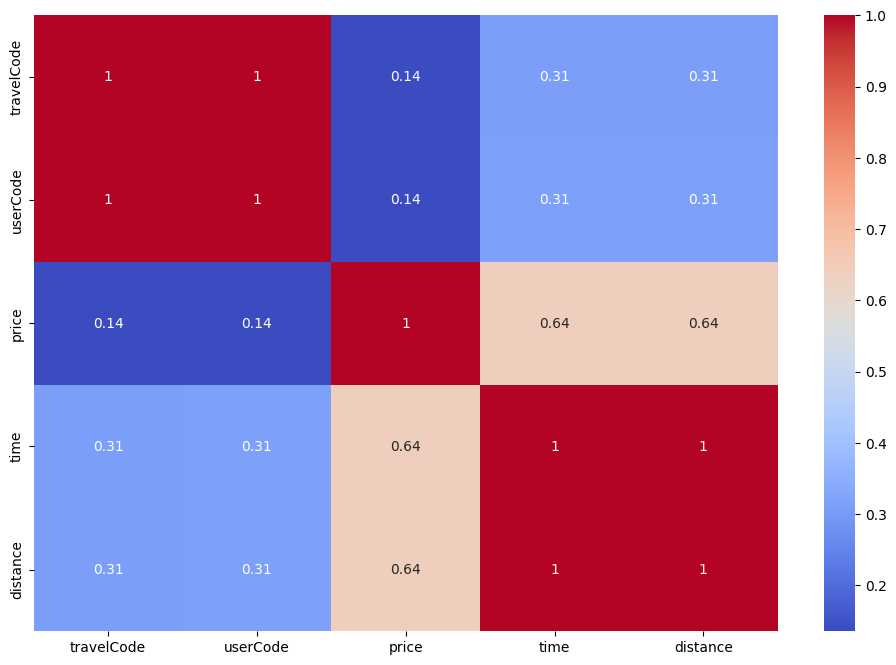

In [17]:
numeric_cols = flights_df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
corr_matrix = numeric_cols.corr()
corr_with_target = corr_matrix['price'].abs().sort_values(ascending=False)
print(corr_with_target)

threshold = 0.3
selected_features = corr_with_target[corr_with_target > threshold].index
print("Selected features:", selected_features)

price         1.000000
distance      0.641915
time          0.641800
userCode      0.137282
travelCode    0.135749
Name: price, dtype: float64
Selected features: Index(['price', 'distance', 'time'], dtype='object')


In [19]:
numeric_cols = ['distance', 'time', 'price']
numerical_df = flights_df[numeric_cols].reset_index(drop=True)

In [20]:
new_flights_df = pd.concat([numerical_df, encoded_df], axis=1)

In [21]:
new_flights_df.head()

,distance,time,price,from_Aracaju (SE),from_Brasilia (DF),from_Campo Grande (MS),from_Florianopolis (SC),from_Natal (RN),from_Recife (PE),from_Rio de Janeiro (RJ),...,to_Recife (PE),to_Rio de Janeiro (RJ),to_Salvador (BH),to_Sao Paulo (SP),flightType_economic,flightType_firstClass,flightType_premium,agency_CloudFy,agency_FlyingDrops,agency_Rainbow
0,676.53,1.76,1434.38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,676.53,1.76,1292.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,637.56,1.66,1487.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,637.56,1.66,1127.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,830.86,2.16,1684.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
X = new_flights_df.drop('price', axis=1)
y = new_flights_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

Mean Squared Error: 10640.311874028483
R-squared: 0.919250389537233
RMSE: 103.15188739925452


In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Random Forest Regression RMSE: {rmse_rf}')

Random Forest Regression RMSE: 4.886908402256591e-12


In [25]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate RMSE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f'Gradient Boosting Regression RMSE: {rmse_gb}')

Gradient Boosting Regression RMSE: 39.22277276682182


# **It is clearly visible that Random Forest Regressor Model has performed exceptionally well. So, I am making pkl file of Random Forest Model.**

In [26]:
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(encoder_model, 'encoder_model.pkl')

['encoder_model.pkl']

In [28]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
from threading import Thread
from pyngrok import ngrok

# Load the trained model and encoder
model = joblib.load('random_forest_model.pkl')
encoder = joblib.load('encoder_model.pkl')

# Define the expected columns based on the training data
expected_columns = ['distance', 'time'] + list(encoder.get_feature_names_out(['from', 'to', 'flightType', 'agency']))

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input data from the request
        data = request.get_json(force=True)
        df = pd.DataFrame(data)

        # Preprocess the categorical columns
        categorical_cols = ['from', 'to', 'flightType', 'agency']
        categorical_features = df[categorical_cols]
        categorical_encoded = encoder.transform(categorical_features)
        categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

        # Concatenate the numerical features with the encoded categorical features
        numerical_features = df[['distance', 'time']]
        df_processed = pd.concat([numerical_features, categorical_df], axis=1)

        # Ensure all expected columns are present
        for col in expected_columns:
            if col not in df_processed.columns:
                df_processed[col] = 0

        # Reorder columns to match the training data
        df_processed = df_processed[expected_columns]

        # Make predictions
        prediction = model.predict(df_processed)

        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

def run_flask():
    app.run(port=5000)

# Start Flask app in a separate thread
flask_thread = Thread(target=run_flask)
flask_thread.start()

# Set up ngrok
NGROK_AUTH_TOKEN = "2V1dW3QU9dMtAmG2PST5tArWbtq_54ssb8xUdLtCh5Z5uvFhL"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
public_url = ngrok.connect(5000)
print('Public URL:', public_url)

 * Serving Flask app '__main__'
 * Debug mode: off
Public URL: NgrokTunnel: "https://e12e-34-125-217-89.ngrok-free.app" -> "http://localhost:5000"


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


# **Below I am giving the cURL from where you can test in Postman. Just need to change BaseUrl.**

In [ ]:
# curl -X POST http://localhost:5000/predict \
# -H "Content-Type: application/json" \
# -d '[
#     {
#         "distance": 1200,
#         "time": 180,
#         "from": "JFK",
#         "to": "LAX",
#         "flightType": "economic",
#         "agency": "FlyingDrops"
#     },
#     {
#         "distance": 800,
#         "time": 120,
#         "from": "ORD",
#         "to": "MIA",
#         "flightType": "firstClass",
#         "agency": "Rainbow"
#     }
# ]'


# **Conclusion**

This project demonstrates the full lifecycle of building, deploying, and managing a machine learning model in production. From data preprocessing and model training to REST API development and scalable deployment with Kubernetes, the system is designed for robustness and real-time prediction capabilities. Automated workflows with Apache Airflow and CI/CD integration via Jenkins further enhance the reliability of the system, ensuring smooth updates and deployments over time.